### Comparing several classification algorigthms using the Iris flower dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
# Types of flowers
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
# Flower features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# Select two features as one flower type for testing
X = iris.data[:,(2,3)]
y = (iris["target"]==2).astype(np.float64)

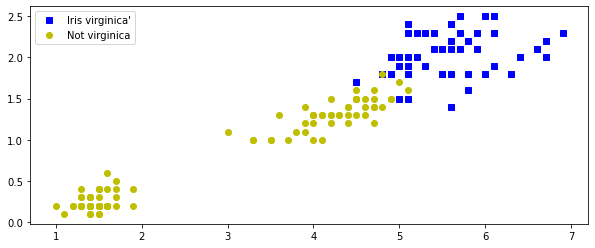

In [5]:
# Quick look at the data
plt.figure(figsize=(10, 4))
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris virginica'")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Not virginica")
plt.legend()

In [87]:
# Create plotting fxn
def plot_iris_results(clf, ax, scaler=scaler):
    
    # Create grid of predictions
    x0, x1 = np.meshgrid(
            np.linspace(0, 8, 500).reshape(-1, 1),
            np.linspace(0, 3.5, 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    if scaler is None:
        # Make sure to scale
        X_new_scaled = scaler.transform(X_new)

        # Predict
        y_predict = clf.predict(X_new_scaled)

    else:
        y_predict = clf.predict(X_new)
        
    # Make into grid
    zz = y_predict.reshape(x0.shape)

    # Plot
    ax.contourf(x0, x1, zz, cmap='bone')
    ax.plot(X[y==1, 0], X[y==1, 1], 'ow',markeredgecolor=[.5,.5,.5], label="Iris virginica'")
    ax.plot(X[y==0, 0], X[y==0, 1], 'o',markeredgecolor=[.5,.5,.5],color=[0.25, 0.25, 0.25], label="Not virginica")
    ax.legend()
    ax.set_xlabel(iris['feature_names'][2])
    ax.set_ylabel(iris['feature_names'][3])
  

### Support Vector Machine

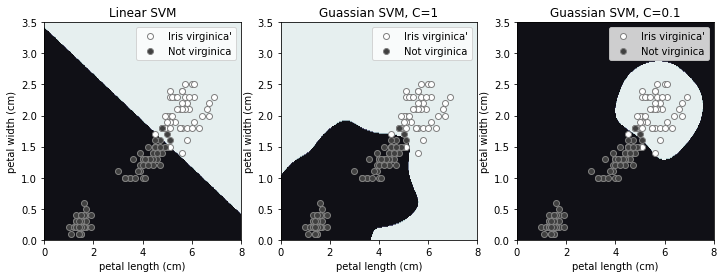

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
scaler = StandardScaler()

svm_clf = LinearSVC(C=10, loss="hinge", max_iter=500)
nl_svm_clf = SVC(kernel="rbf", gamma=5, C=1)

scaled_svm_clf = Pipeline([
    ('scaler', scaler),
    ('linear_scv', svm_clf),
])

scaled_nl_svm_clf = Pipeline([
    ('scaler', scaler),
    ('nonlinear_scv', nl_svm_clf),
])

scaled_svm_clf.fit(X, y)
scaled_nl_svm_clf.fit(X, y)

# Plot model solution and data
fig, axs = plt.subplots(1,3,figsize=(12,4))

# Linear SVM
plot_iris_results(scaled_svm_clf,axs[0],scaler)
axs[0].set_title('Linear SVM')
# Non-Linear SVM
plot_iris_results(scaled_nl_svm_clf,axs[1],scaler)
axs[1].set_title('Guassian SVM, C=1')


nl_svm_clf = SVC(kernel="rbf", gamma=5, C=.1)
scaled_nl_svm_clf = Pipeline([
    ('scaler', scaler),
    ('nonlinear_scv', nl_svm_clf),
])
scaled_nl_svm_clf.fit(X, y)

# Non-Linear SVM
plot_iris_results(scaled_nl_svm_clf,axs[2],scaler)
axs[2].set_title('Guassian SVM, C=0.1')

plt.show()

### Decision Tree

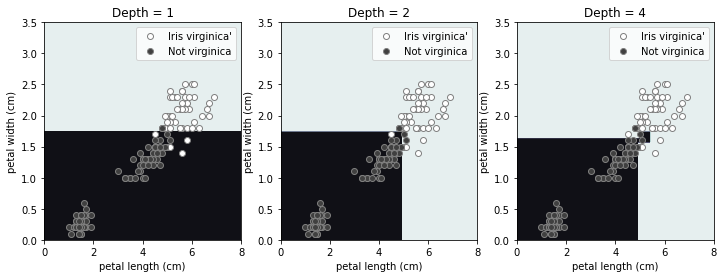

In [111]:
from sklearn.tree import DecisionTreeClassifier

fig, axs = plt.subplots(1,3,figsize=(12,4))

tree_clf = DecisionTreeClassifier(max_depth=1)
tree_clf.fit(X,y)
plot_iris_results(tree_clf,axs[0])
axs[0].set_title('Depth = 1')

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)
plot_iris_results(tree_clf,axs[1])
axs[1].set_title('Depth = 2')

tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X,y)
plot_iris_results(tree_clf,axs[2])
axs[2].set_title('Depth = 4')

plt.show()

### Random Forrest

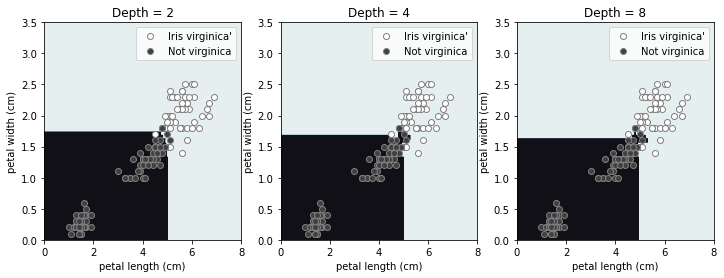

In [124]:
from sklearn.ensemble import RandomForestClassifier

fig, axs = plt.subplots(1,3,figsize=(12,4))

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=2)
rf_clf.fit(X,y)
plot_iris_results(rf_clf,axs[0])
axs[0].set_title('Depth = 2')

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=4)
rf_clf.fit(X,y)
plot_iris_results(rf_clf,axs[1])
axs[1].set_title('Depth = 4')

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=8)
rf_clf.fit(X,y)
plot_iris_results(rf_clf,axs[2])
axs[2].set_title('Depth = 8')

plt.show()

### Neural Network, MLP Classifier

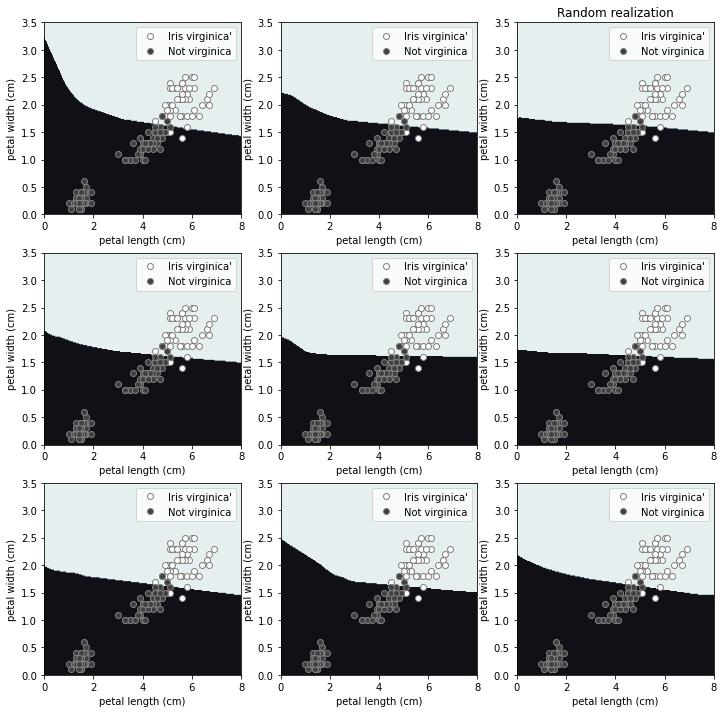

In [136]:
from sklearn.neural_network import MLPClassifier

fig, axs = plt.subplots(3,3,figsize=(12,12))
axs = axs.ravel()

for ii in range(9):
    mlp_clf = MLPClassifier(max_iter=5000, hidden_layer_sizes=25, alpha=0.001)
    mlp_clf.fit(X,y)
    plot_iris_results(mlp_clf,axs[ii])
    if ii == 1:
        axs[ii].set_title('Random realization')

plt.show()

### Neural Network Regressor

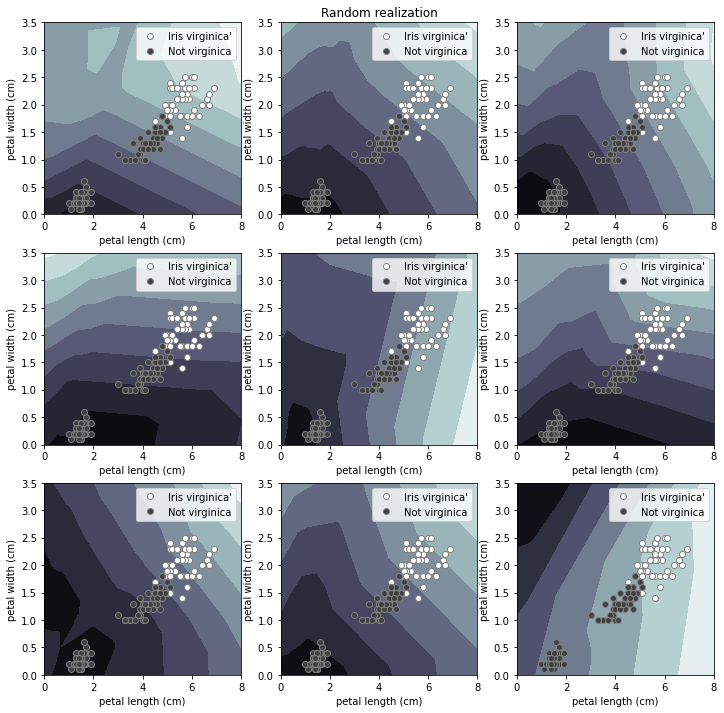

In [142]:
from sklearn.neural_network import MLPRegressor

fig, axs = plt.subplots(3,3,figsize=(12,12))
axs = axs.ravel()

for ii in range(9):
    mlp_clf = MLPRegressor(max_iter=5000, hidden_layer_sizes=25, alpha=0.0001)
    mlp_clf.fit(X,y)
    plot_iris_results(mlp_clf,axs[ii])
    if ii == 1:
        axs[ii].set_title('Random realization')
        
plt.show()    